## Resumen

El presente cuaderno, corresponde a un análisis descriptivo y de pronóstico de una importante red de 54 tiendas Retail de productos de consumo del hogar distribuidas en el territorio ecuatoriano.  En su desarrollo se explorarán diferentes métodos y modelos para llegar a un escenario de predecir el número de transacciones posibles. Los datos tienen por período las transacciones desde el 2013 al 2017, agrupadas en diferentes datasets suministrados por la empresa con fines académicos.   

Los datos proporcionados son una tabla con las siguientes variables / características: fecha, identificación de la tienda, identificación del artículo, volumen de ventas, promoción. Podemos ver los datos como N series de tiempo, una por combinación (tienda, artículo). Muchas de estas series de tiempo están más probablemente correlacionadas entre sí.

In [40]:
# MANIPULACIÓN DE LOS DATOS
import numpy as np # Algebra Linear 
import pandas as pd # Procesamiento
import datetime # Manipulación de los datos 
import random #Aleatoriedad
import folium
import datetime
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import math
from scipy.misc import imread

# VIZUALIZACIÓN
import matplotlib.pyplot as plt # Plotear
import seaborn 
%matplotlib inline

# APRENDIZAJE SUPERVISADO
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import AgglomerativeClustering as AggClust 
from scipy.cluster.hierarchy import ward,dendrogram 



## Tiendas
En este apartado vamos a conocer la distribución de las tiendas y el actual agrupamiento de las según los clúster´s suministrados por la organización.

In [12]:
stores=pd.read_csv('stores.csv')

In [35]:
locations = pd.DataFrame(columns=['city','count'])
locations['city'] = stores['city'].value_counts().index.values
locations['count'] = stores['city'].value_counts().tolist()

locations['latitude']=[-0.1807,-2.1710,-0.2389,-2.9001,-1.2543,-0.9677,-3.2581,-0.9316,
                       -0.2714,-1.0225,-2.2234,-0.3392,-1.5905,-1.6636,-0.0320,-1.8622,
                       -2.2306,-1.4924,-2.6285,-4.0079,-1.8019,-0.9682]
locations['longitude']=[-78.4678,-79.9224,-79.1774,-79.0059,-78.6229,-80.7089,-79.9554,-78.6058,
                        -79.4648,-79.4604,-80.9585,-78.1222,-78.9995,-78.6546,-78.1507,-79.9777,
                        -80.9002,-78.0024,-80.3896,-79.2113,-79.5346,-79.6517]


START = [-1.75,-78.6229]
map = folium.Map(location=START, zoom_start=7, height=500, width=900)
for index, loc in locations.iterrows():
    if loc['count']>10:
        c = 'black'
    elif loc['count']>5:
        c = 'orange'
    elif loc['count']==3:
        c='blue'
    elif loc['count']==2:
        c = 'yellow'
    else:
        c='red'
    folium.Marker(location = [loc['latitude'],loc['longitude']],icon=folium.Icon(color=c),popup=str(loc['count'])).add_to(map)
display(map)

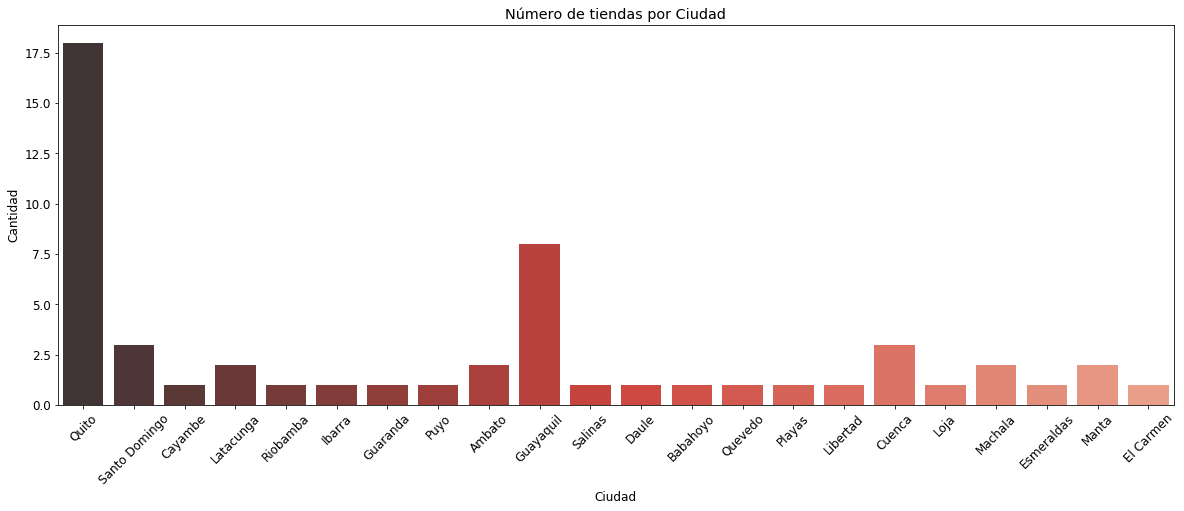

In [38]:
plt.close('all')
plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=stores, x='city', palette="Reds_d")
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.title('Número de tiendas por Ciudad')
plt.show()

Text(0.5,1,'Número de Tiendas y Clusters')

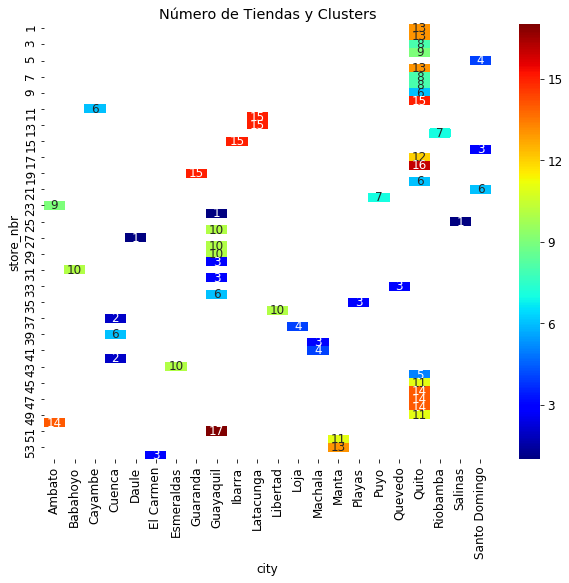

In [16]:
plt.figure(figsize=(10,8))
store_pivot = stores.dropna().pivot("store_nbr","city", "cluster")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Número de Tiendas y Clusters')

In [17]:
stores.groupby(['state','city']).agg({'store_nbr':'size'})

store_nbr
state                          city                    
Azuay                          Cuenca                 3
Bolivar                        Guaranda               1
Chimborazo                     Riobamba               1
Cotopaxi                       Latacunga              2
El Oro                         Machala                2
Esmeraldas                     Esmeraldas             1
Guayas                         Daule                  1
                               Guayaquil              8
                               Libertad               1
                               Playas                 1
Imbabura                       Ibarra                 1
Loja                           Loja                   1
Los Rios                       Babahoyo               1
                               Quevedo                1
Manabi                         El Carmen              1
                               Manta                  2
Pastaza                        Puyo                   1
Pichincha                      Cayambe                1
                               Quito                 18
Santa Elena                    Salinas                1
Santo Domingo de los Tsachilas Santo Domingo          3
Tungurahua                     Ambato                 2

Text(0.5,1,'Número de Tiendas por cada Ciudad')

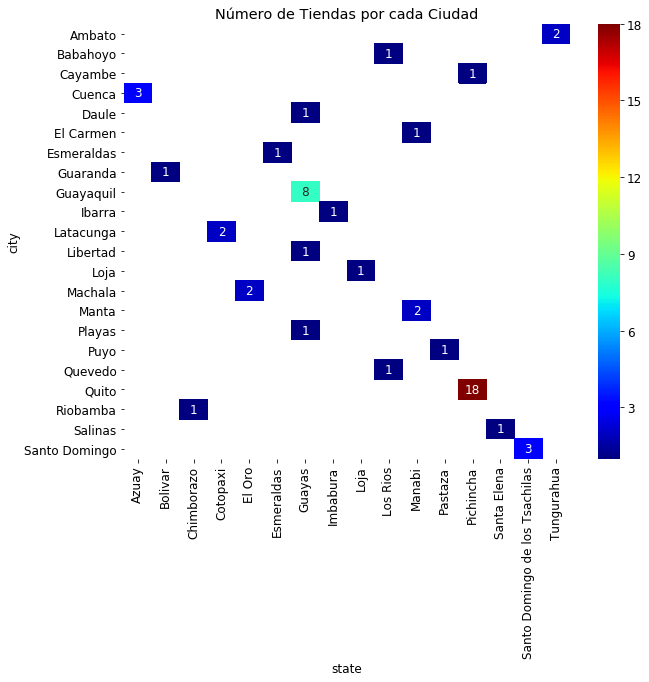

In [22]:
plt.figure(figsize=(10,8))
store_pivot = stores.groupby(['state','city']).agg({'store_nbr':'size'}).reset_index().pivot('city','state','store_nbr')

ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Número de Tiendas por cada Ciudad')

Text(0.5,0,'Tipo de tiendas')

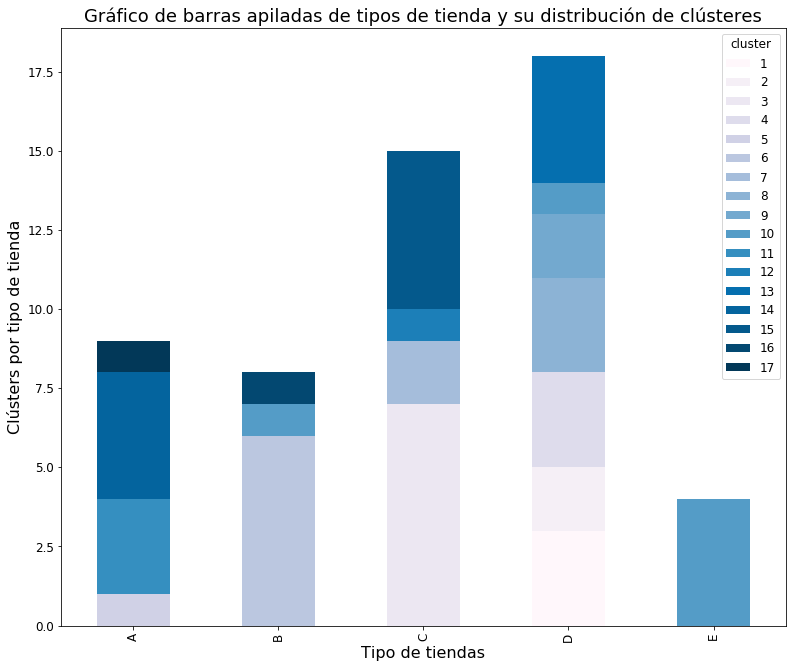

In [23]:
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Gráfico de barras apiladas de tipos de tienda y su distribución de clústeres', fontsize=18)
plt.ylabel('Clústers por tipo de tienda', fontsize=16)
plt.xlabel('Tipo de tiendas', fontsize=16)

Text(0.5,0,'Ciudades')

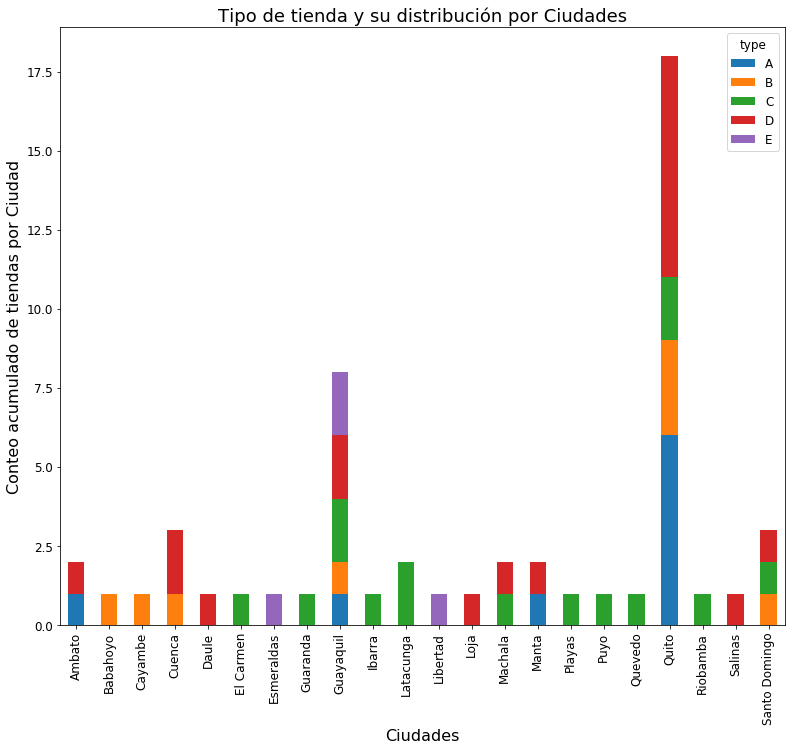

In [161]:
city_type= stores.groupby(['city','type']).size()
city_type.unstack().plot(kind='bar',stacked=True, figsize=(13,11),  grid=False)
plt.title('Tipo de tienda y su distribución por Ciudades', fontsize=18)
plt.ylabel('Conteo acumulado de tiendas por Ciudad', fontsize=16)
plt.xlabel('Ciudades', fontsize=16)

## Productos

Profundizando se describe los productos comercializados por la red de tiendas y el peso porcentual que estos ocupan dentro de la organización.

In [41]:
items=pd.read_csv('items.csv')

In [162]:
items.groupby('family').agg({'item_nbr':'size'})

,item_nbr
family,
AUTOMOTIVE,20
BABY CARE,1
BEAUTY,19
BEVERAGES,613
BOOKS,1
BREAD/BAKERY,134
CELEBRATION,31
CLEANING,446
DAIRY,242


In [43]:
items.groupby('class').agg({'item_nbr':'size'})

,item_nbr
class,
1002,31
1003,4
1004,39
1005,1
1006,12
1008,12
1010,22
1012,10
1013,2


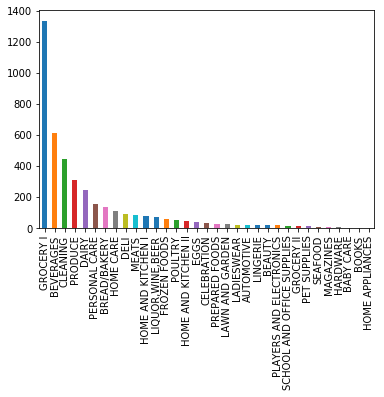

In [44]:
items['family'].value_counts().plot(kind='bar')

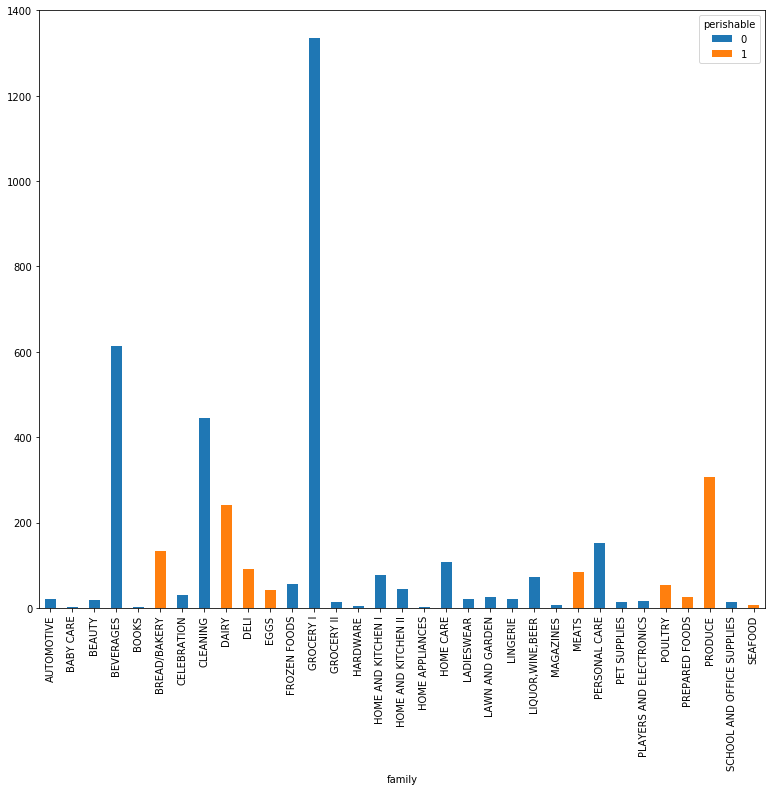

In [50]:
family_perish= items.groupby(['family','perishable']).size()
family_perish.unstack().plot(kind='bar',stacked=True, figsize=(13,11),  grid=False)

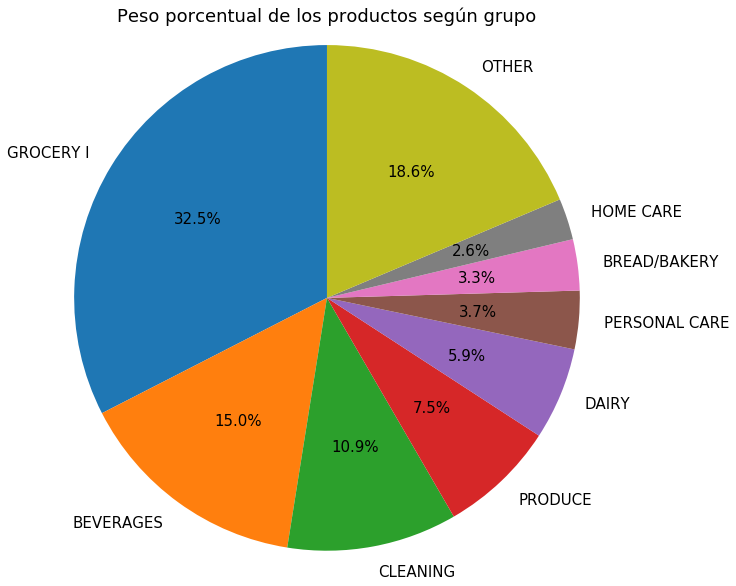

In [53]:
sizes = items['family'].value_counts()
other = sizes[sizes < 100]
sizes_adj = sizes[sizes >=100]
sizes_adj['OTHER'] = other.sum()

plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 15.0
labels = sizes_adj.index.values
plt.pie(sizes_adj, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Peso porcentual de los productos según grupo')
plt.axis('equal') 
plt.show()


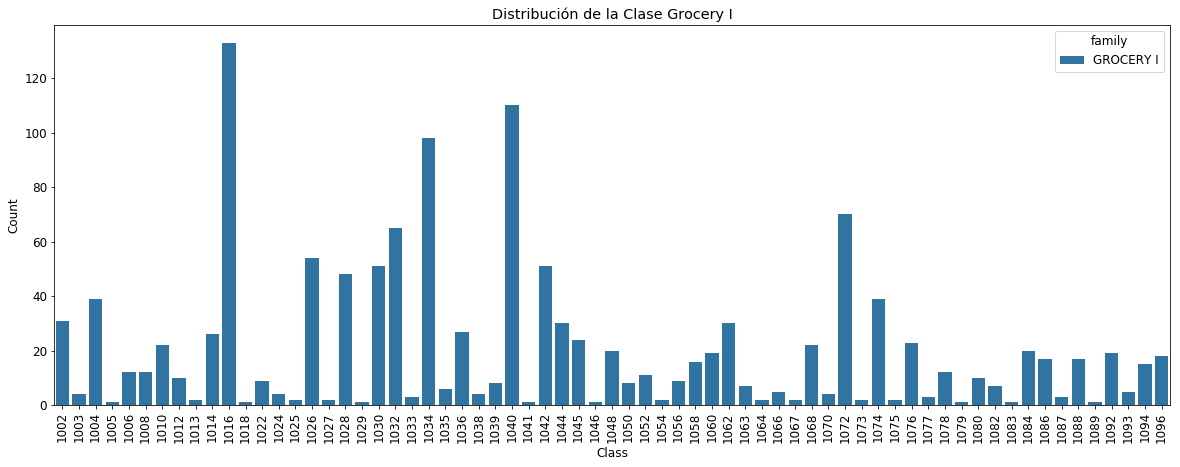

In [63]:
# filter for grocery i
gclasses = items[items['family']=='GROCERY I']
# get list of classes used by this family
gclasses = gclasses['class'].unique()
# get all tiems with those classes
itemsgc = items[items['class'].isin(gclasses)]

plt.close('all')
plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=itemsgc, x='class', hue='family')
plt.xticks(rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribución de la Clase Grocery I')

plt.show()

## Periodicidad

Se identifica la periodicidad y los días de mayores ventas utilizando además como referencia los días festivos nacionales y regionales del Ecuador

In [54]:
transact=pd.read_csv('transactions.csv',parse_dates=['date'])

In [55]:
transact_cut=transact[(transact['date']>pd.Timestamp('2016-01-01')) & (transact['date']<pd.Timestamp('2016-10-01'))]

In [56]:
transact_cut.groupby('store_nbr').agg({'transactions':'mean'}).sort_values(by='transactions',ascending=False)

,transactions
store_nbr,
44,4202.490775
47,3758.564576
45,3566.380074
46,3283.509225
3,3147.551852
49,2884.616236
48,2831.055351
8,2654.007407
50,2380.837638


In [58]:
transact_cut['day_of_week']=transact_cut['date'].apply(pd.Timestamp.weekday)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


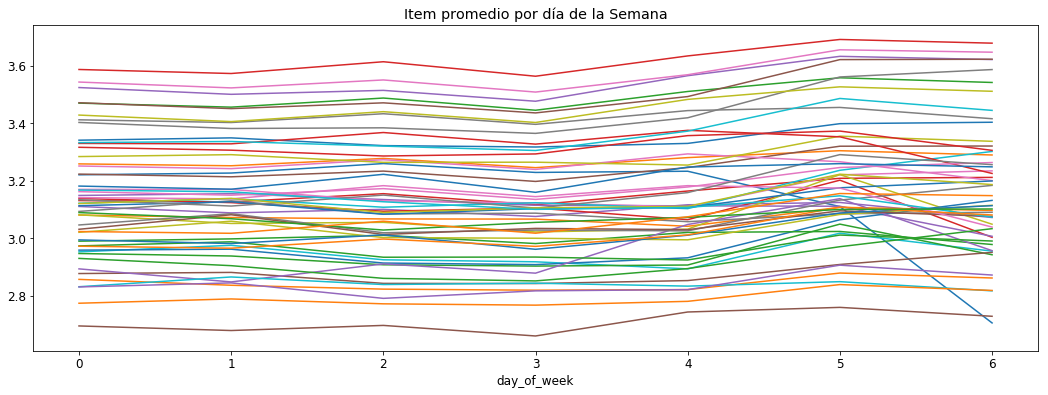

In [88]:
fig, ax = plt.subplots(figsize=(18,6))

transact_mean=transact_cut[['store_nbr','transactions','day_of_week']].groupby(
    ['store_nbr','day_of_week']).agg({'transactions':lambda x:np.log10(np.mean(x))}).unstack()['transactions']
for i in transact_mean.index:
    transact_mean.loc[i].plot(ax=ax)
    plt.title('Item promedio por día de la Semana')

In [96]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


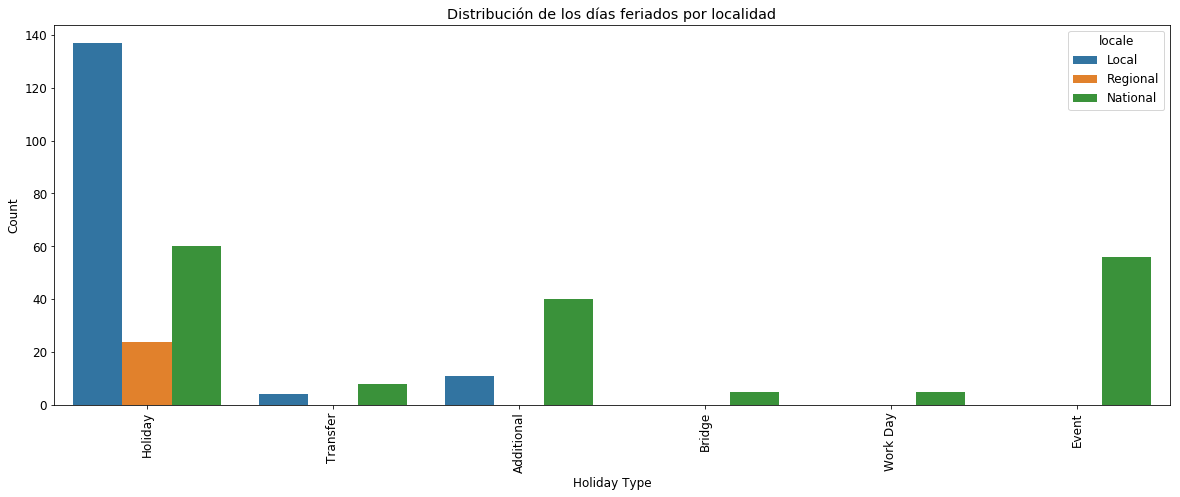

In [163]:
plt.close('all')
plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=holidays, x='type', hue='locale')
plt.xticks(rotation='vertical')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.title('Distribución de los días feriados por localidad')
plt.show()

In [99]:
local = holidays[holidays['locale']=='Local']
regional = holidays[holidays['locale']=='Regional']
national = holidays[holidays['locale']=='National']

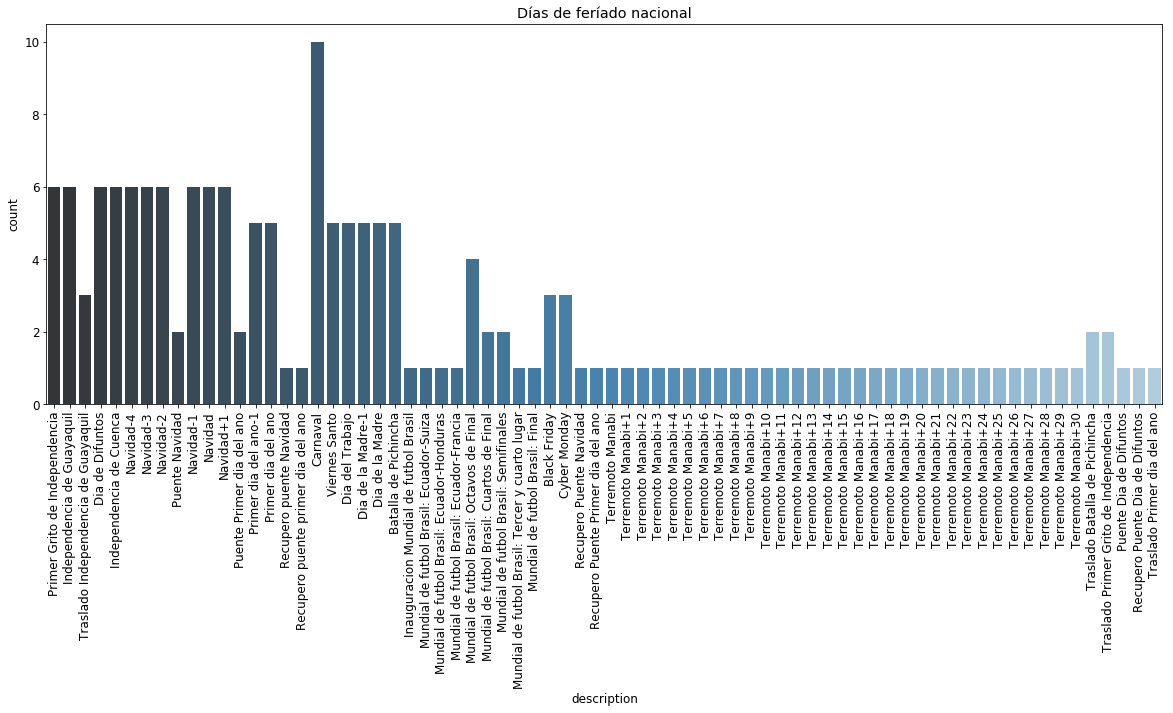

In [164]:
plt.close('all')

plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=national, x='description', palette='Blues_d')
plt.xticks(rotation='vertical')
plt.title('Días de feríado nacional')
plt.show()

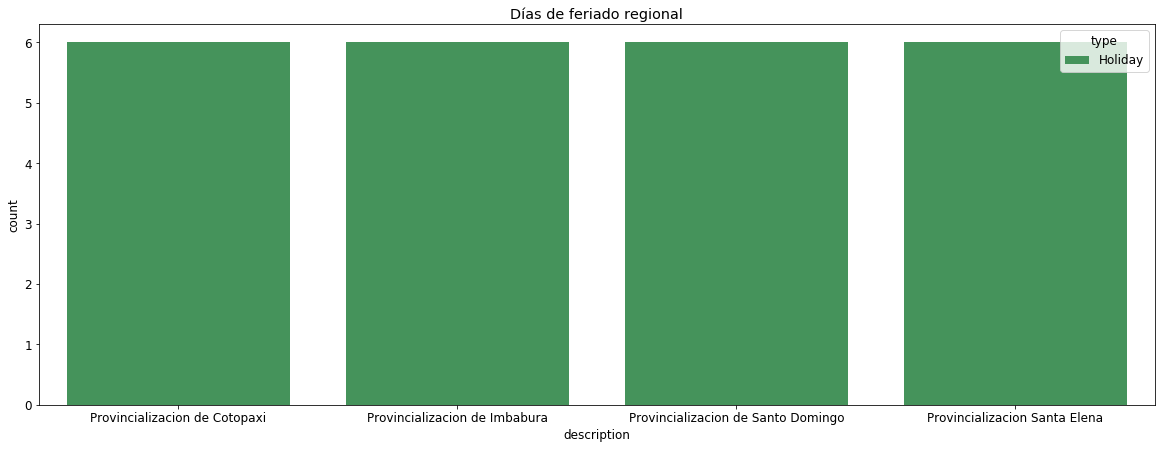

In [165]:
plt.close('all')

plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=regional, x='description', hue='type', palette="Greens_d")
#plt.xticks(rotation=45)
plt.title('Días de feriado regional')
plt.show()

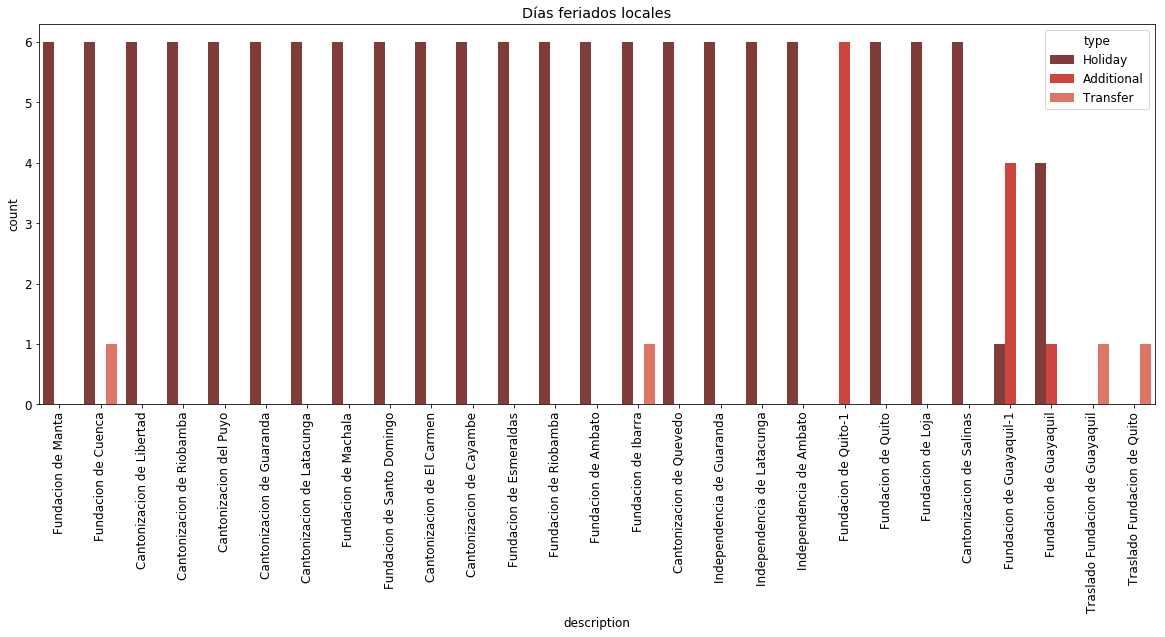

In [166]:
plt.close('all')

plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=local, x='description', hue='type', palette="Reds_d")
plt.xticks(rotation='vertical')
plt.title('Días feriados locales')
plt.show()

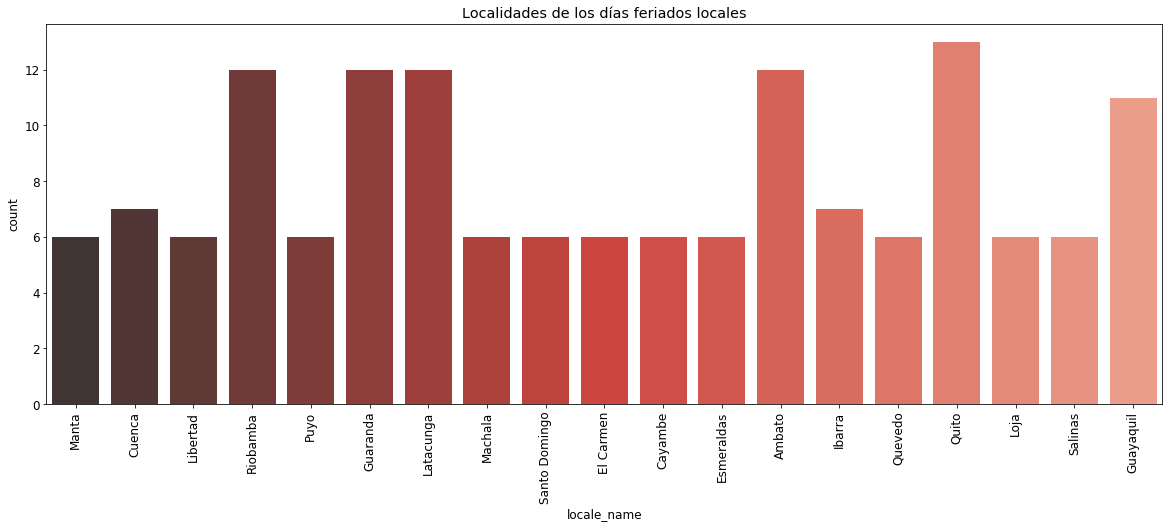

In [167]:
plt.close('all')

plt.figure(figsize=(20,7))
matplotlib.rcParams['font.size'] = 12.0
sns.countplot(data=local, x='locale_name', palette="Reds_d")
plt.xticks(rotation='vertical')
plt.title('Localidades de los días feriados locales')
plt.show()

## Transacciones

Ahora analizar las transacciones utilizando como modelo la tienda más grande de la red, a modo de conocer si los tipos de tiendas se ajustan al modelo previo de cluster´s  y además compararemos este comportamiento utilizando de referencia una de las tiendas de la red

In [168]:
transactions=pd.read_csv('transactions.csv',parse_dates=['date'])

In [67]:
tmp = sales.groupby('store_nbr')['date'].agg([np.min, np.max]).rename(columns={'amin': 'start','amax': 'end'})
tmp[tmp.start>="2014-01-01"]

,start,end
store_nbr,,
20,2015-02-13,2017-08-15
21,2015-07-24,2017-08-15
22,2015-10-09,2017-08-15
29,2015-03-20,2017-08-15
42,2015-08-21,2017-08-15
52,2017-04-20,2017-08-15
53,2014-05-29,2017-08-15


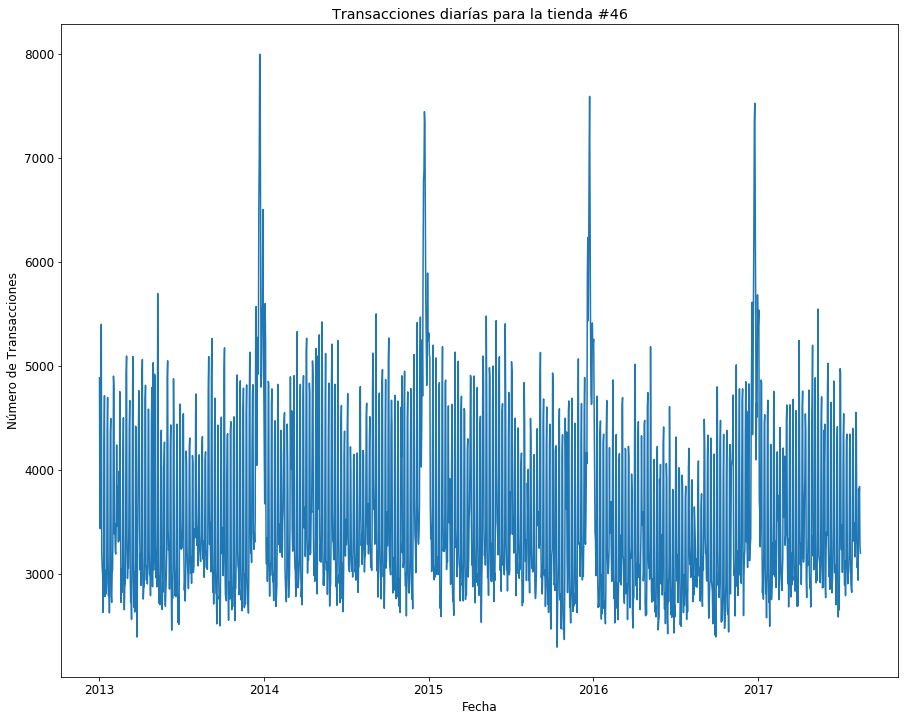

In [174]:
ts=sales.loc[sales.store_nbr==46,['date','transactions']].set_index('date')
ts=ts.transactions.astype('float')
plt.figure(figsize=(15,12))
plt.title('Transacciones diarías para la tienda #46')
plt.xlabel('Fecha')
plt.ylabel('Número de Transacciones')
plt.plot(ts);

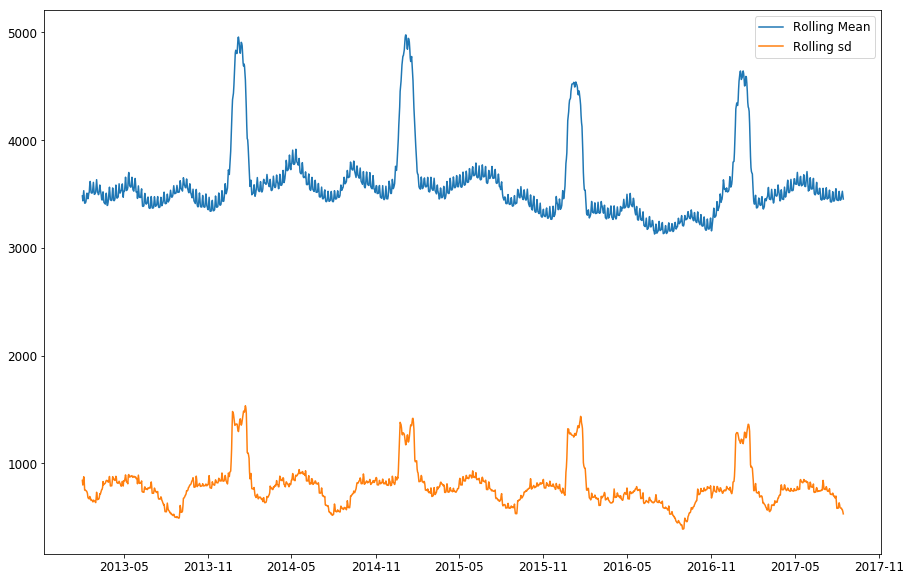

In [175]:
plt.figure(figsize=(15,10))
plt.plot(ts.rolling(window=30,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=30,center=False).std(),label='Rolling sd');
plt.legend();

In [176]:
# What about that low outlier
print(ts.min())
ts['2015-06-21':'2015-06-27']
## 2015-06-24 ## There was very few transactions on this date

2293.0


date
2015-06-21    4616.0
2015-06-22    3299.0
2015-06-23    3039.0
2015-06-24    3070.0
2015-06-25    2834.0
2015-06-26    3076.0
2015-06-27    4297.0
Name: transactions, dtype: float64

In [177]:
tmp = sales.groupby('store_nbr')['date'].agg([np.min, np.max]).rename(columns={'amin': 'start','amax': 'end'})
tmp[tmp.start>="2014-01-01"]

,start,end
store_nbr,,
20,2015-02-13,2017-08-15
21,2015-07-24,2017-08-15
22,2015-10-09,2017-08-15
29,2015-03-20,2017-08-15
42,2015-08-21,2017-08-15
52,2017-04-20,2017-08-15
53,2014-05-29,2017-08-15


In [178]:
sales[(sales.store_nbr==22)].to_csv('tmp.csv',index=False)

In [179]:
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales['week'] = sales['date'].dt.week
sales['dow'] = sales['date'].dt.dayofweek
sales['dayofyear'] = sales['date'].dt.dayofyear
sales['dayoff']=[x in [5,6] for x in sales.dow] ## Weekends

sales[sales.dow==6].head()

,date,store_nbr,transactions,city,state,type,cluster,month,day,week,...,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,year
270,2013-01-06,1,520.0,Quito,Pichincha,D,13.0,1,6,1,...,0,0,0,0,0,0,0,0,0,2013
648,2013-01-13,1,542.0,Quito,Pichincha,D,13.0,1,13,2,...,0,0,0,0,0,0,0,0,0,2013
1026,2013-01-20,1,507.0,Quito,Pichincha,D,13.0,1,20,3,...,0,0,0,0,0,0,0,0,0,2013
1404,2013-01-27,1,542.0,Quito,Pichincha,D,13.0,1,27,4,...,0,0,0,0,0,0,0,0,0,2013
1782,2013-02-03,1,531.0,Quito,Pichincha,D,13.0,2,3,5,...,0,0,0,0,0,0,0,0,0,2013


In [180]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,0
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,0
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,0
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,0
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,0


In [181]:
# Enable all holidays
for (d,t,l,n) in zip(holidays.date,holidays.type,holidays.locale,holidays.locale_name):
    if t!='Work Day' and t!='Event':  
        if l=='National':
            sales.loc[sales.date==d,'dayoff']=True
        elif l=='Regional':
            sales.loc[(sales.date==d)&(sales.state==n),'dayoff']=True
        else:
            sales.loc[(sales.date==d)&(sales.city==n),'dayoff']=True
    else:
        sales.loc[(sales.date==d),'dayoff']=False

In [182]:
## Some manual verifications
sales.loc[lambda df: df.date=='2015-01-10'].head()
#sales.loc[lambda df: (df.date=='2017-04-13') & (df.city=='Cuenca')].head()
#sales.loc[lambda df: (df.date=='2013-04-01') & (df.state=='Cotopaxi')].head()

,date,store_nbr,transactions,city,state,type,cluster,month,day,week,...,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,year
39906,2015-01-10,1,1534.0,Quito,Pichincha,D,13.0,1,10,2,...,0,0,0,0,0,0,0,0,0,2015
39907,2015-01-10,2,2083.0,Quito,Pichincha,D,13.0,1,10,2,...,0,0,0,0,0,0,0,0,0,2015
39908,2015-01-10,3,3601.0,Quito,Pichincha,D,8.0,1,10,2,...,0,0,0,0,0,0,0,0,0,2015
39909,2015-01-10,4,1689.0,Quito,Pichincha,D,9.0,1,10,2,...,0,0,0,0,0,0,0,0,0,2015
39910,2015-01-10,5,1645.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4.0,1,10,2,...,0,0,0,0,0,0,0,0,0,2015


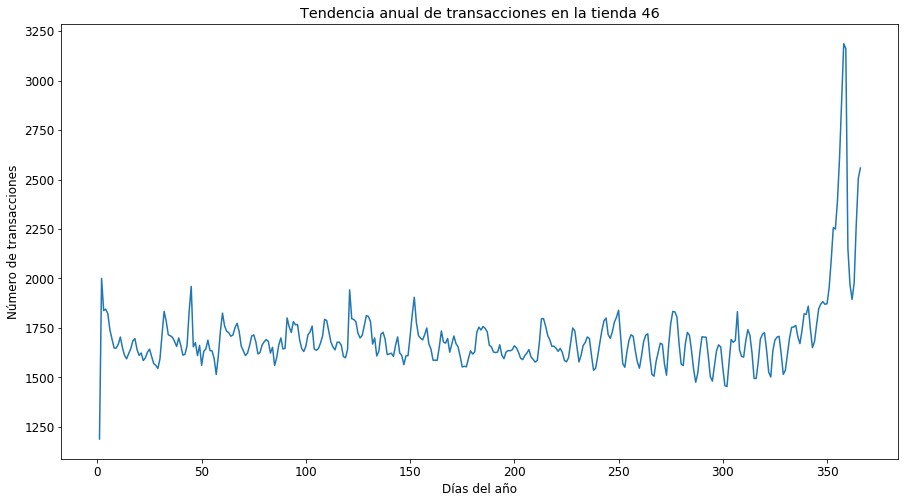

In [189]:
ts2 = sales.groupby(['dayofyear'])['transactions'].mean()

plt.figure(figsize=(15,8))
plt.title('Tendencia anual de transacciones en la tienda 46')
plt.xlabel('Días del año')
plt.ylabel('Número de transacciones')
plt.plot(ts2);

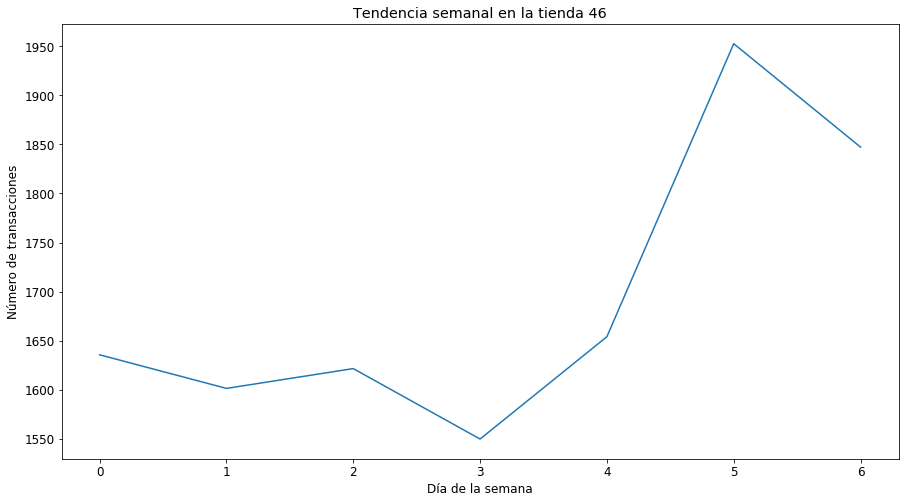

In [185]:
ts3 = sales.groupby(['dow'])['transactions'].mean()

plt.figure(figsize=(15,8))
plt.title('Tendencia semanal en la tienda 46')
plt.xlabel('Día de la semana')
plt.ylabel('Número de transacciones')
plt.plot(ts3);

## Clúster

La organización dispone de una clasificación propia de cluster´s. el objeto de este apartado es confirmar la valides de agrupamiento y de encontrar diferencias, proponer un modelo de clasificación de las tiendas basado en los datos suministrados.

In [116]:
def plot_store_transactions(store_viz,n=30,split=False):
    temp=sales.loc[sales.store_nbr==store_viz].set_index('date')
    plt.figure(figsize=(12,6))
    if split:
        ax1=plt.subplot(1,2,1)
        plt.scatter(temp.loc[~temp.dayoff].index,
                    temp.loc[~temp.dayoff].transactions,label='working days')
        plt.scatter(temp.loc[temp.dayoff].index,
                    temp.loc[temp.dayoff].transactions,label='off days')
        plt.legend()
        plt.title('Daily transactions. Store {}, Type {}, Cluster {}'.format(store_viz,
                                                                        list(stores.loc[stores.store_nbr==store_viz,'type'])[0],
                                                                        list(stores.loc[stores.store_nbr==store_viz,'cluster'])[0])
                 )
        ax2=plt.subplot(1,2,2,sharey=ax1,sharex=ax1)
        plt.plot(temp.loc[~temp.dayoff,'transactions'].rolling(window=n).mean(),label='working days')
        plt.plot(temp.loc[temp.dayoff,'transactions'].rolling(window=n).mean(),label='off days')
        plt.legend()
        plt.title('Store {}: {} day rolling means'.format(store_viz,n))
        plt.setp(ax2.get_yticklabels(), visible=False)
    else:
        ax1=plt.subplot(1,2,1)
        plt.scatter(temp.index,temp.transactions)
        plt.title('Daily transactions. Store {}, Type {}, Cluster {}'.format(store_viz,
                                                                        list(stores.loc[stores.store_nbr==store_viz,'type'])[0],
                                                                        list(stores.loc[stores.store_nbr==store_viz,'cluster'])[0])
                 )
        ax2=plt.subplot(1,2,2,sharey=ax1)
        plt.plot(temp.transactions.rolling(window=n).mean())
        plt.title('Store {}: {} day rolling means'.format(store_viz,n))
        plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

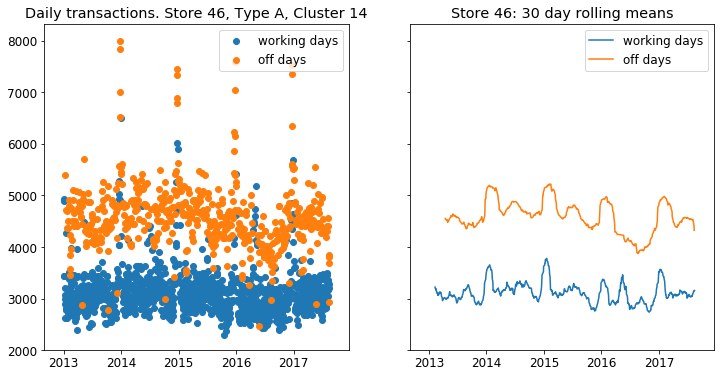

In [192]:
plot_store_transactions(46,30,True)

In [118]:
def plot_store_transactions_type(typ):
    typ_stores=stores.loc[stores.type==typ,'store_nbr']
    n=len(typ_stores)
    m=1
    for x in range(1,6):
        if (n-1) in range((x-1)**2,x**2):
            m=x
    plt.figure(figsize=(15,15))
    for x in range(n):
        nbr=typ_stores.iloc[x]
        ax1 = plt.subplot(m,m,x+1)
        ax1.scatter(sales.loc[(~sales.dayoff)&(sales.store_nbr==nbr),'date'].values,
                sales.loc[(~sales.dayoff)&(sales.store_nbr==nbr),'transactions'])
        ax1.scatter(sales.loc[(sales.dayoff)&(sales.store_nbr==nbr),'date'].values,
                sales.loc[(sales.dayoff)&(sales.store_nbr==nbr),'transactions'])
        plt.title('Store {}, Type {}, Cluster {}'.format(nbr,
                                                         list(stores.loc[stores.store_nbr==nbr,'type'])[0],
                                                         list(stores.loc[stores.store_nbr==nbr,'cluster'])[0])
             )
        plt.suptitle(' Type {} stores'.format(typ),fontsize=25)
    plt.show()

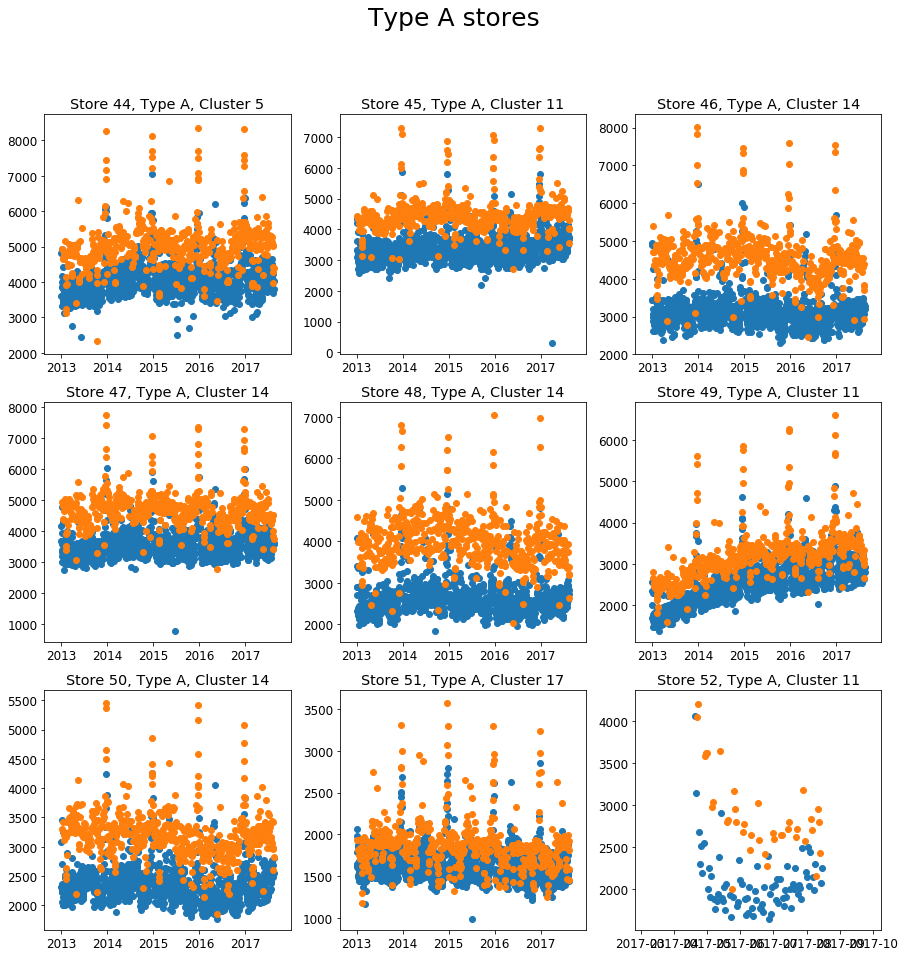

In [119]:
plot_store_transactions_type('A')

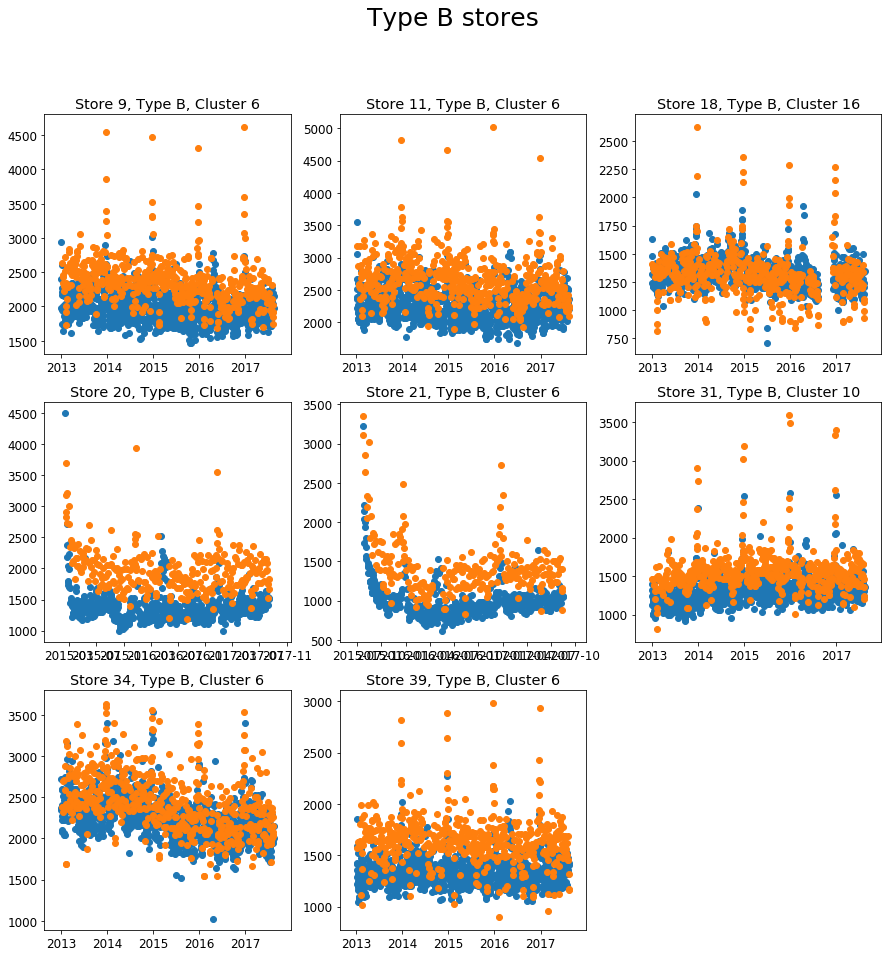

In [120]:
plot_store_transactions_type('B')

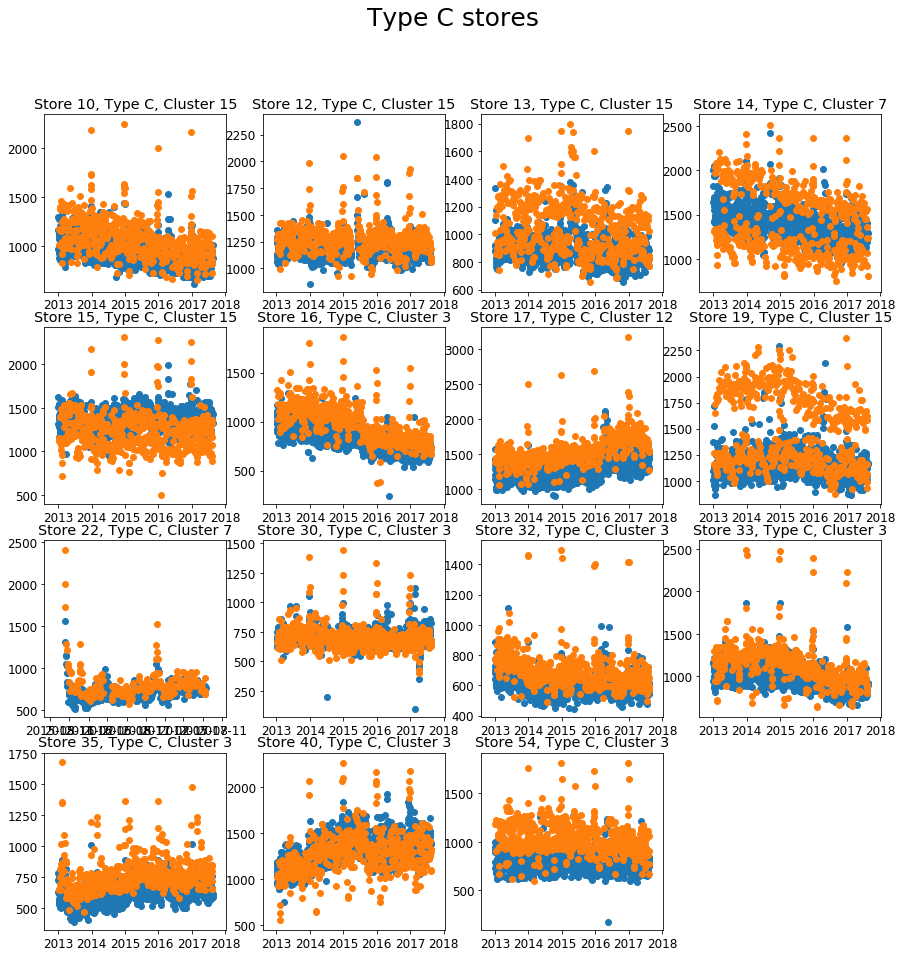

In [121]:
plot_store_transactions_type('C')

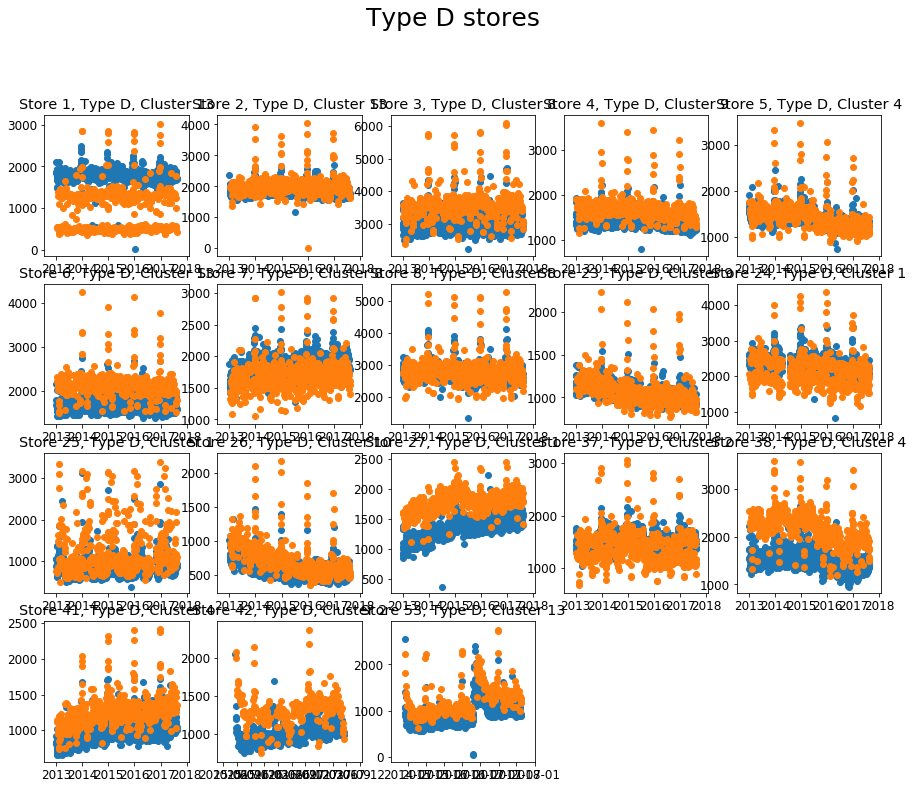

In [122]:
plot_store_transactions_type('D')

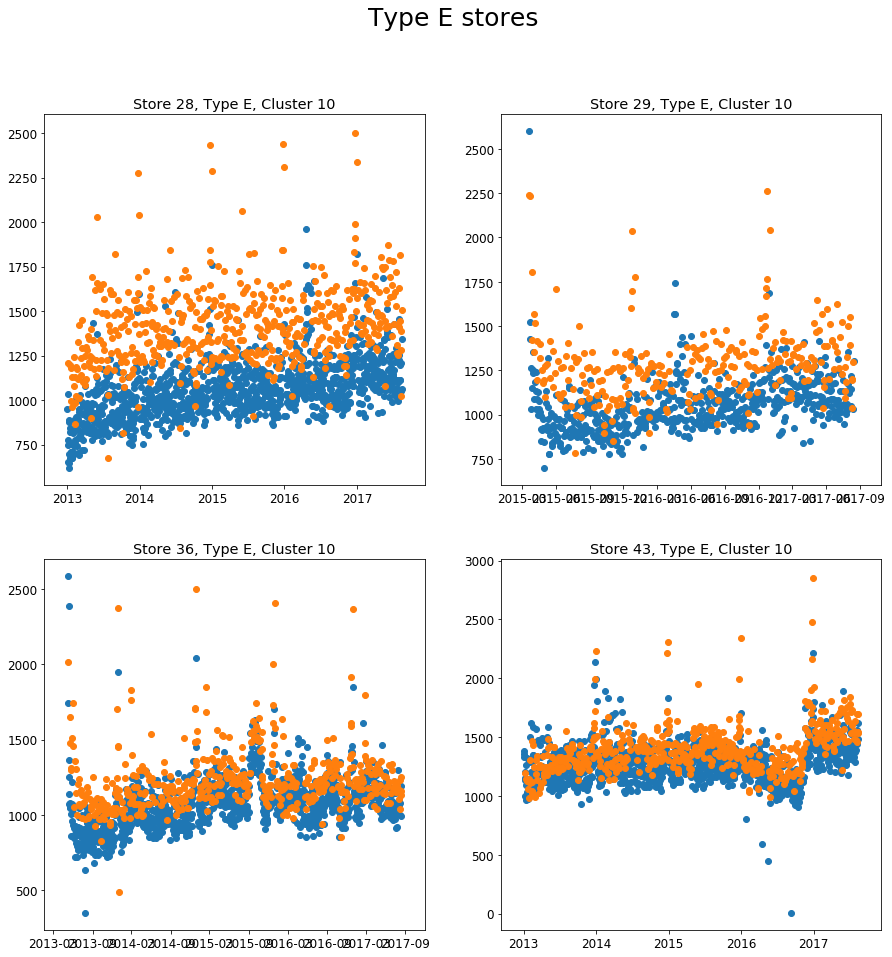

In [123]:
plot_store_transactions_type('E')

## Propuesta de Clúster

En este apartado se propone una nueva clasificación de las 54 tiendas

In [125]:
Means1=sales.groupby(['store_nbr','dayoff']).transactions.agg(['mean','std']).unstack(level=1)
Means2=sales.groupby(['store_nbr','day']).transactions.agg(['mean','std']).unstack(level=1)
sales_by_store=sales.groupby(['store_nbr']).transactions.sum()/sales.groupby(['store_nbr']).transactions.count()
sales['normalized']=[v/sales_by_store[s] for (s,v) in zip(sales.store_nbr,sales.transactions)]
Means1_norm=sales.groupby(['store_nbr','dayoff']).normalized.agg(['mean','std']).unstack(level=1)
Means2_norm=sales.groupby(['store_nbr','day']).normalized.agg(['mean','std']).unstack(level=1)

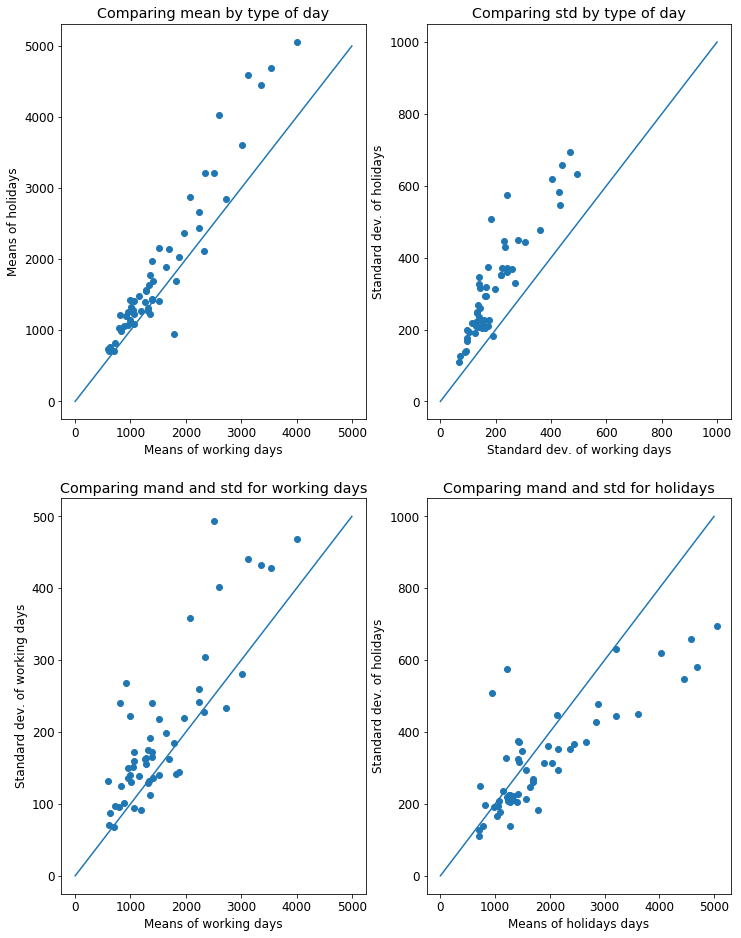

In [126]:
plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
plt.scatter(Means1.iloc[:,0],Means1.iloc[:,1])
plt.xlabel('Means of working days')
plt.ylabel('Means of holidays')
plt.plot([0,5000],[0,5000])
plt.title('Comparing mean by type of day')
plt.subplot(2,2,2)
plt.scatter(Means1.iloc[:,2],Means1.iloc[:,3])
plt.xlabel('Standard dev. of working days')
plt.ylabel('Standard dev. of holidays')
plt.plot([0,1000],[0,1000])
plt.title('Comparing std by type of day');
plt.subplot(2,2,3)
plt.scatter(Means1.iloc[:,0],Means1.iloc[:,2])
plt.xlabel('Means of working days')
plt.ylabel('Standard dev. of working days')
plt.plot([0,5000],[0,500])
plt.title('Comparing mand and std for working days')
plt.subplot(2,2,4)
plt.scatter(Means1.iloc[:,1],Means1.iloc[:,3])
plt.xlabel('Means of holidays days')
plt.ylabel('Standard dev. of holidays')
plt.plot([0,5000],[0,1000]);
plt.title('Comparing mand and std for holidays');

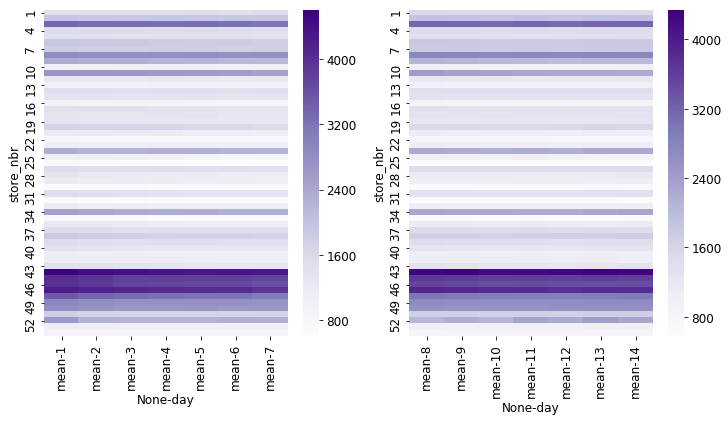

In [193]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
seaborn.heatmap(Means2.iloc[:,0:7],cmap='Purples');
plt.subplot(1,2,2)
seaborn.heatmap(Means2.iloc[:,7:14],cmap='Purples');

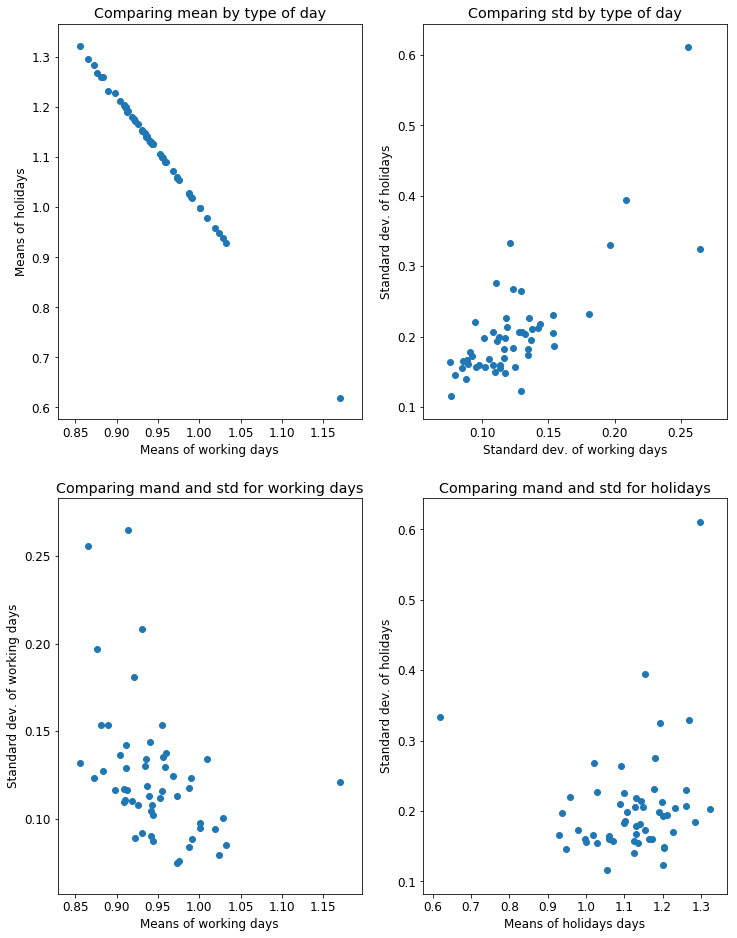

In [128]:
plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
plt.scatter(Means1_norm.iloc[:,0],Means1_norm.iloc[:,1])
plt.xlabel('Means of working days')
plt.ylabel('Means of holidays')
plt.title('Comparing mean by type of day')
plt.subplot(2,2,2)
plt.scatter(Means1_norm.iloc[:,2],Means1_norm.iloc[:,3])
plt.xlabel('Standard dev. of working days')
plt.ylabel('Standard dev. of holidays')
plt.title('Comparing std by type of day');
plt.subplot(2,2,3)
plt.scatter(Means1_norm.iloc[:,0],Means1_norm.iloc[:,2])
plt.xlabel('Means of working days')
plt.ylabel('Standard dev. of working days')
plt.title('Comparing mand and std for working days')
plt.subplot(2,2,4)
plt.scatter(Means1_norm.iloc[:,1],Means1_norm.iloc[:,3])
plt.xlabel('Means of holidays days')
plt.ylabel('Standard dev. of holidays')
plt.title('Comparing mand and std for holidays');

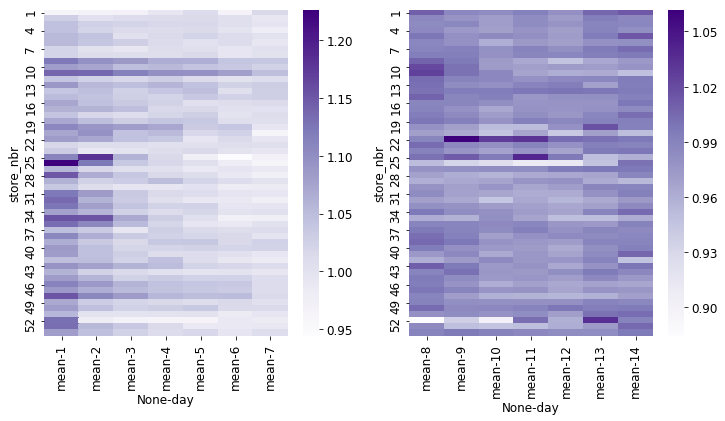

In [194]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
seaborn.heatmap(Means2_norm.iloc[:,0:7],cmap='Purples');
plt.subplot(1,2,2)
seaborn.heatmap(Means2_norm.iloc[:,7:14],cmap='Purples');

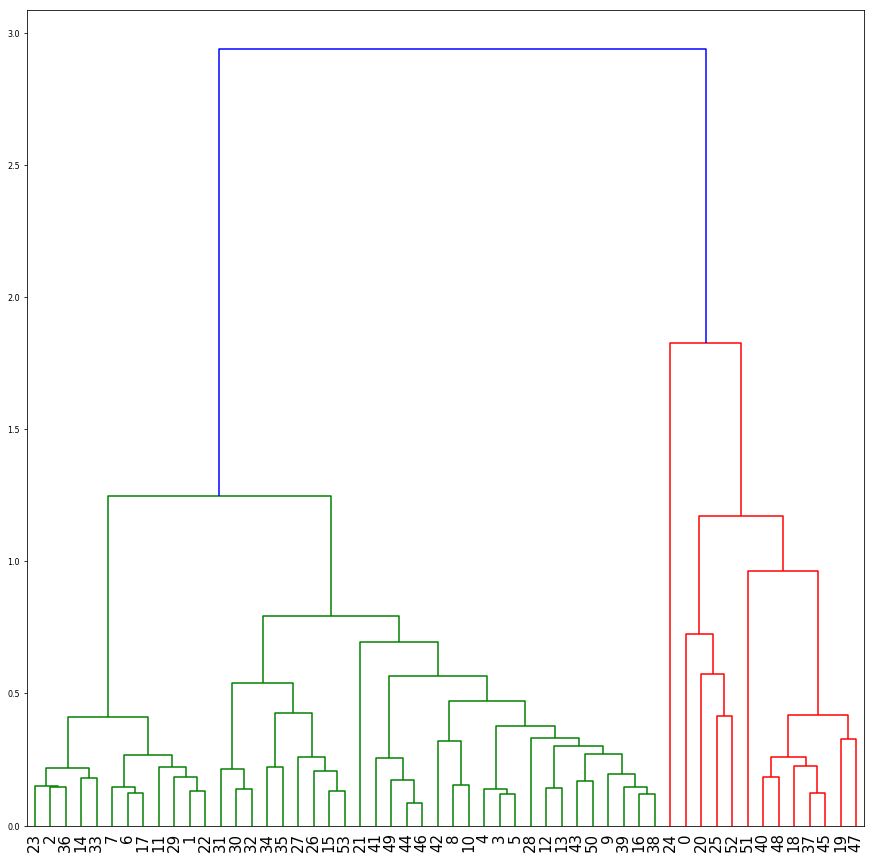

In [130]:
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)
dendrogram(ward(Means2_norm),ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)
plt.show()

In [131]:
clustering=AggClust(n_clusters=6)
cluster=clustering.fit_predict(Means2_norm)
stores['new_cluster']=cluster

def plot_store_transactions_new_cluster(clust):
    clust_stores=stores.loc[stores['new_cluster']==clust,'store_nbr']
    n=len(clust_stores)
    m=1
    for x in range(1,10):
        if (n-1) in range((abs(x-1))**2,x**2):
            m=x
    plt.figure(figsize=(15,15))
    for x in range(n):
        nbr=clust_stores.iloc[x]
        ax1 = plt.subplot(m,m,x+1)
        ax1.scatter(sales.loc[(~sales.dayoff)&(sales.store_nbr==nbr),'date'].values,
                sales.loc[(~sales.dayoff)&(sales.store_nbr==nbr),'transactions'])
        ax1.scatter(sales.loc[(sales.dayoff)&(sales.store_nbr==nbr),'date'].values,
                sales.loc[(sales.dayoff)&(sales.store_nbr==nbr),'transactions'])
        plt.title('Store {}, Type {}, Cluster {}'.format(nbr,
                                                         list(stores.loc[stores.store_nbr==nbr,'type'])[0],
                                                         list(stores.loc[stores.store_nbr==nbr,'cluster'])[0])
             )
    plt.show()

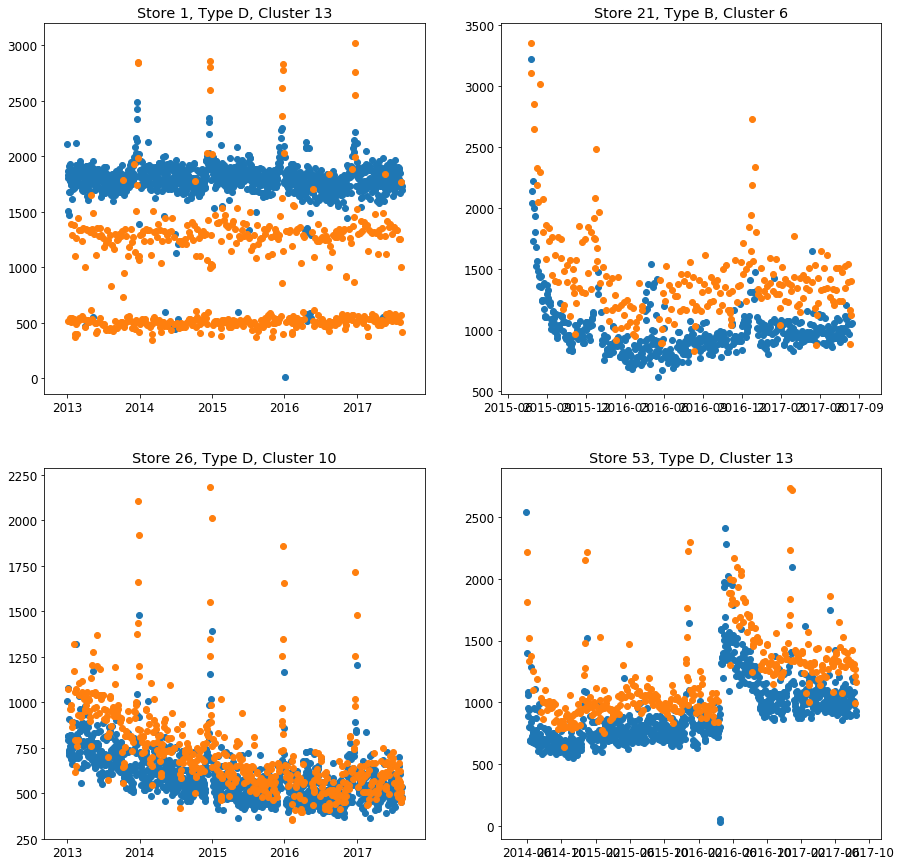

In [132]:
plot_store_transactions_new_cluster(1)

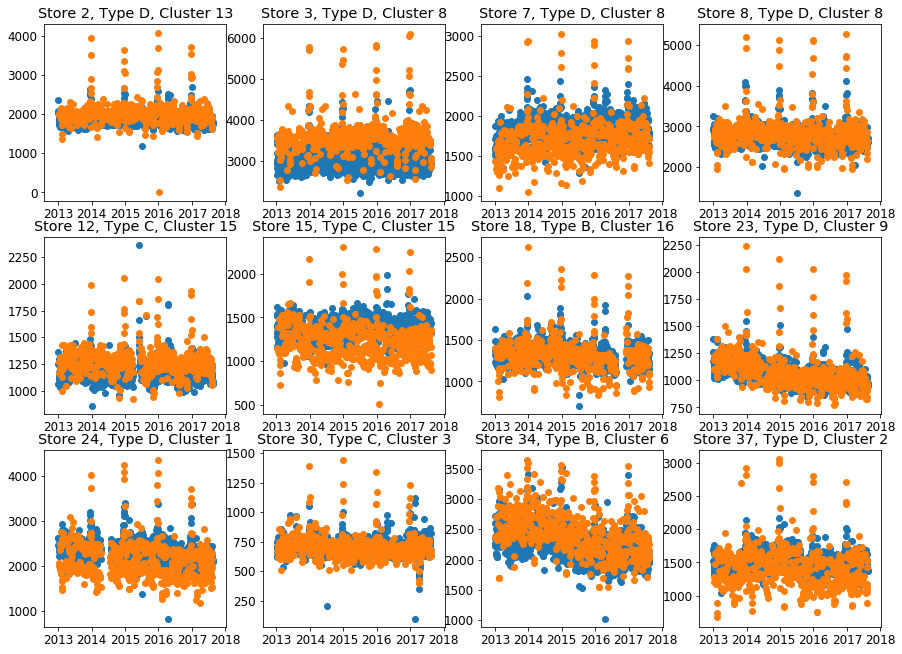

In [133]:
plot_store_transactions_new_cluster(3)

## Modelo Predictivo de Transacciones

Con los nuevos agrupacmientos es posible predecir el comportamiento optimizado de las transacciones

In [195]:
def add_date_features(df):
    #df['year'] = df['date'].dt.year
    #df['month'] = df['date'].dt.month
    #df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    df['dow'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayoff']=[x in [5,6] for x in df.dow] ## Weekends

add_date_features(sales)
sales.head()

,date,store_nbr,transactions,city,state,type,cluster,month,day,week,...,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,year
54,2013-01-02,1,2111.0,Quito,Pichincha,D,13.0,1,2,1,...,0,0,0,0,0,0,0,0,0,2013
108,2013-01-03,1,1833.0,Quito,Pichincha,D,13.0,1,3,1,...,0,0,0,0,0,0,0,0,0,2013
162,2013-01-04,1,1863.0,Quito,Pichincha,D,13.0,1,4,1,...,0,0,0,0,0,0,0,0,0,2013
216,2013-01-05,1,1509.0,Quito,Pichincha,D,13.0,1,5,1,...,0,0,0,0,0,0,0,0,0,2013
270,2013-01-06,1,520.0,Quito,Pichincha,D,13.0,1,6,1,...,0,0,0,0,0,0,0,0,0,2013


In [149]:
def encode(df, column) -> pd.DataFrame:
    one_hot = pd.get_dummies(df[column], drop_first=False, prefix=column)
    #return (one_hot - one_hot.mean()) / one_hot.std()
    return one_hot

def encode_categorical_features(sales):
    cat_columns = ['store_nbr'] #['store_nbr','city', 'state', 'type']
    
    for column in cat_columns:
        column_enc = encode(sales, column)
        sales = pd.concat([sales,column_enc], axis=1)
    
    return sales


sales = encode_categorical_features(sales)

In [150]:
print_cols = [c for c in sales.columns if 
             not c.startswith('store_nbr_') and 
             not c.startswith('city_') and 
             not c.startswith('state') and 
             not c.startswith('type_')]

In [151]:
md = [(c,sales[c].isnull().sum()) for c in sales.columns]

for a in md:
    if a[1]>0:
        print(a)

In [152]:
print_cols = print_cols+[c for c in sales.columns if c.startswith('lag_')]

In [154]:
### Drop nan and sort data
###There is lots of them because of the creation of the lag features

def clean_data_for_prediction(df):
    # Drop
    #print('Dropping nan rows...')
    #print("Before: ", df.shape)
    #df.dropna(inplace=True)
    #print("After: ", df.shape)
    
    # Sort
    print('Sorting')
    df.sort_values(['store_nbr', 'date'], ascending=[True, True], inplace=True)
    df = df.reindex()
    
    return df


sales = clean_data_for_prediction(sales)

## save processed dataset
sales[[c for c in sales.columns if not c.startswith('store_nbr_')]].to_csv('sales+.csv',index=False)

Sorting


In [155]:
X1 = sales.loc[(sales.date<'2017-08-01') & (sales.date>='2016-01-01')].copy()
X2 = sales.loc[sales.date>='2017-08-01'].copy()

target_column = 'transactions' 
y1 = X1[target_column].values
y2 = X2[target_column].values

In [156]:
#sc_ = [c for c in sales.columns if c.startswith('store_nbr_')]
#sc = [c for c in sales.columns if c.startswith('state_')]
#cc = [c for c in sales.columns if c.startswith('city_')]
#tc = [c for c in sales.columns if c.startswith('type_')]
cols = [c for c in X1 if c not in ['date','store_nbr','type','city','state',
                                   'transactions','transactions2', 'cluster']]
cols

#drop_cols = ['city','state','type','cluster', 'transactions2', 'transactions3'] + \
#            [c for c in sales.columns if c.startswith("state_") or c.startswith("type_") or c.startswith("city_")]

['month',
 'day',
 'week',
 'dow',
 'dayofyear',
 'dayoff',
 'normalized',
 'lag_7',
 'lag_annual',
 'store_nbr_1',
 'store_nbr_2',
 'store_nbr_3',
 'store_nbr_4',
 'store_nbr_5',
 'store_nbr_6',
 'store_nbr_7',
 'store_nbr_8',
 'store_nbr_9',
 'store_nbr_10',
 'store_nbr_11',
 'store_nbr_12',
 'store_nbr_13',
 'store_nbr_14',
 'store_nbr_15',
 'store_nbr_16',
 'store_nbr_17',
 'store_nbr_18',
 'store_nbr_19',
 'store_nbr_20',
 'store_nbr_21',
 'store_nbr_22',
 'store_nbr_23',
 'store_nbr_24',
 'store_nbr_25',
 'store_nbr_26',
 'store_nbr_27',
 'store_nbr_28',
 'store_nbr_29',
 'store_nbr_30',
 'store_nbr_31',
 'store_nbr_32',
 'store_nbr_33',
 'store_nbr_34',
 'store_nbr_35',
 'store_nbr_36',
 'store_nbr_37',
 'store_nbr_38',
 'store_nbr_39',
 'store_nbr_40',
 'store_nbr_41',
 'store_nbr_42',
 'store_nbr_43',
 'store_nbr_44',
 'store_nbr_45',
 'store_nbr_46',
 'store_nbr_47',
 'store_nbr_48',
 'store_nbr_49',
 'store_nbr_50',
 'store_nbr_51',
 'store_nbr_52',
 'store_nbr_53',
 'store_

In [157]:
from sklearn import metrics

np.random.seed(1122)

number_regressors_to_test = 3
for method in range(1, number_regressors_to_test+1):
    print('\nmethod = ', method)
    
    if (method==1):
        print('Multilayer perceptron (MLP) neural network 01')
        str_method = 'MLP model01'    
        r = MLPRegressor(hidden_layer_sizes=(3,), max_iter=100)
    if (method==2):
        print('Bagging Regressor 01')
        str_method = 'BaggingRegressor01'
        r = BaggingRegressor(DecisionTreeRegressor(max_depth=6,max_features=0.85))

    if (method==3):
        np.random.seed(1122)
        print('GradientBoosting 01')
        str_method = 'GradientBoosting01'
        r = GradientBoostingRegressor()        

    r.fit(X1[cols], y1)
    yh2 = r.predict(X2[cols])
    X2['prediction_%d'%method] = yh2
    m = metrics.mean_squared_error(y2, yh2)**0.5

    print("Error: %f" % (m))


method =  1
Multilayer perceptron (MLP) neural network 01
Error: 122.024545

method =  2
Bagging Regressor 01
Error: 121.110689

method =  3
GradientBoosting 01
Error: 90.325094


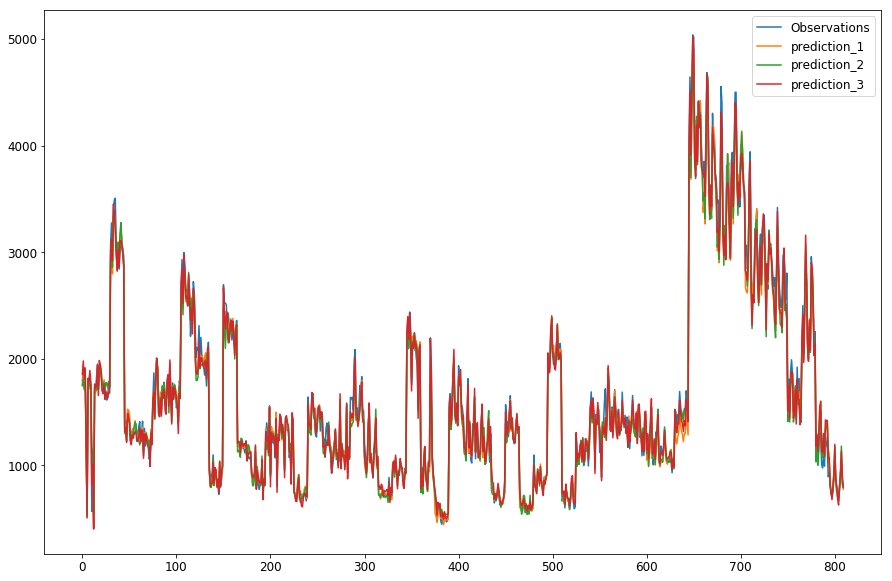

In [158]:
ts  = pd.Series(X2[target_column].values)

plt.figure(figsize=(15,10))
plt.plot(ts, label='Observations')

for c in [c for c in X2.columns if c.startswith("prediction_")]:
    ts_p = pd.Series(X2[c].values)
    plt.plot(ts_p,label=c)

plt.legend()

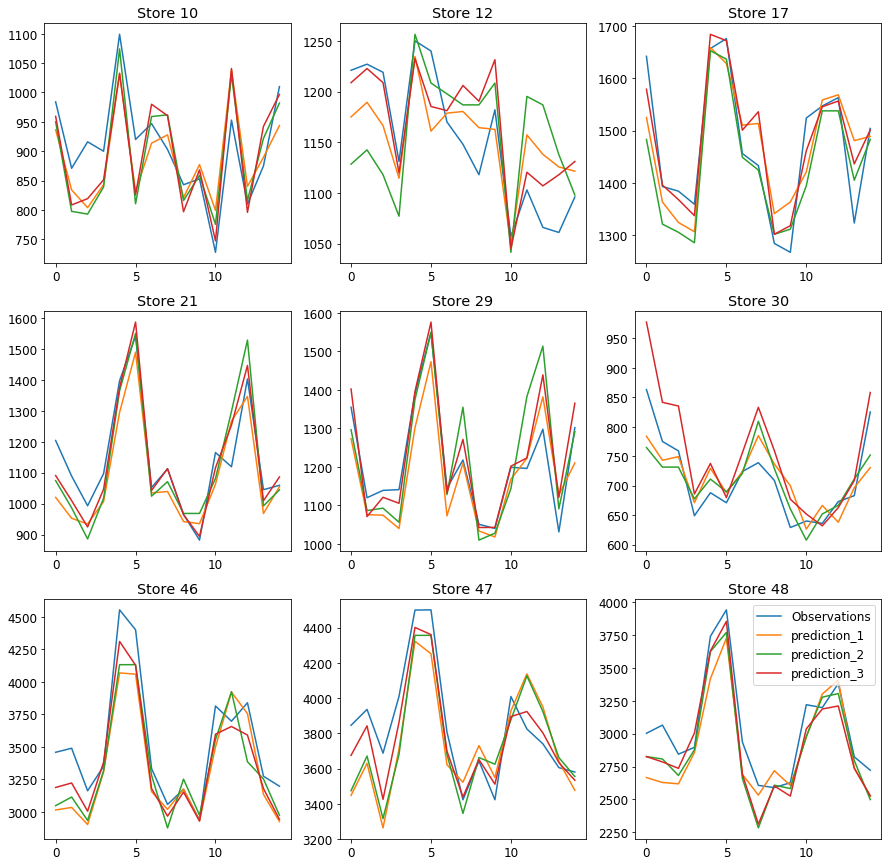

In [159]:
import random
random_stores =  sorted(u_stores[random.sample(range(len(u_stores)), 9) ])

plt.figure(figsize=(15,15))

for i in range(len(random_stores)):
    ax1 = plt.subplot(3,3,i+1)
    a_store = X2[X2.store_nbr==random_stores[i]]
    ts = pd.Series(a_store[target_column].values) # , index = a_store.date
    ax1.plot(ts, label='Observations')
    
    for c in [c for c in X2.columns if c.startswith("prediction_")]:
        ts_p = pd.Series(a_store[c].values) # , index = a_store.date
        ax1.plot(ts_p,label=c)

    plt.title('Store {}'.format(random_stores[i]))

plt.legend()